In [1]:
import os
from datasets import load_dataset

#### 1.1. Fraud Detection Dataset Loading

This section loads the "Cifer-Fraud-Detection-Dataset-AF" dataset from Hugging Face.
The dataset is intended for fraud detection tasks in financial transactions.

We use the `datasets` library to fetch the data, then convert it to a Pandas DataFrame
with proper data types for easier manipulation and analysis.

In [2]:
df = load_dataset("CiferAI/Cifer-Fraud-Detection-Dataset-AF", split="train").to_pandas().convert_dtypes()

#### 1.2. Saving Dataset Locally

After loading and converting the dataset, we save it locally as a Parquet file.
- `os.makedirs` ensures that the folder exists or creates it if missing.
- `to_parquet` is used for efficient storage and fast reading in future steps.

This allows us to avoid repeatedly downloading the dataset from Hugging Face.

In [3]:
os.makedirs("./data/1/", exist_ok=True)
df.to_parquet("./data/1/df.parquet", index=False)

In [1]:
import os
import pandas as pd

#### 2.1. Load Dataset from Local Storage

We read the previously saved Parquet file into a Pandas DataFrame.
Using Parquet ensures fast loading and preserves data types.

In [2]:
df = pd.read_parquet("./data/1/df.parquet")

#### 2.2. Initial Data Exploration

We display the first 5 rows to get a quick overview of the dataset's structure
and verify that the data loaded correctly.

In [3]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,371,CASH_OUT,367336.05,sdv-pii-r8zd6,4514816.83,2108392.86,sdv-pii-q6998,1265486.06,2454140.46,0,0
1,368,TRANSFER,238.63,sdv-pii-xq6z3,430944.71,1865444.6,sdv-pii-n2ql8,107927.46,2021.16,0,0
2,141,CASH_OUT,254.93,sdv-pii-805w0,839593.53,8008353.88,sdv-pii-yo0z6,773352.22,20.79,0,0
3,191,CASH_IN,501547.39,sdv-pii-279tw,41226.4,28633.52,sdv-pii-9zlyl,6825363.55,16442078.24,0,0
4,169,TRANSFER,71832.0,sdv-pii-ksz58,248694.6,793617.86,sdv-pii-0ykbo,579313.76,829850.96,0,0


We also print the dataset's shape to understand the number of rows (transactions)
and columns (features).

In [4]:
print(f"Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns")

Dataset shape: 21000000 rows x 11 columns


#### 2.3. Column Data Types

Displaying the data type of each column helps identify:
- Numerical features (Int64, Float64) suitable for calculations
- Categorical features (string) suitable for encoding or analysis
- Target variable(s) for fraud detection: 'isFraud'

In [5]:
print("Column data types:")
display(df.dtypes.to_frame("Data Type"))

Column data types:


,Data Type
step,Int64
type,string[python]
amount,Float64
nameOrig,string[python]
oldbalanceOrg,Float64
newbalanceOrig,Float64
nameDest,string[python]
oldbalanceDest,Float64
newbalanceDest,Float64
isFraud,Int64


#### 2.4. Descriptive Statistics

We calculate summary statistics for all columns to understand:
- The distribution of numerical features (mean, min, max, std)
- The unique values and counts for categorical features
- Potential anomalies or unexpected ranges in the data

In [6]:
print("Descriptive statistics for all columns:")
display(df.describe(include="all").T)

Descriptive statistics for all columns:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,21000000.0,<NA>,<NA>,<NA>,238.869977,163.244711,1.0,112.0,205.0,333.0,743.0
type,21000000,5,CASH_OUT,7392758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,21000000.0,<NA>,<NA>,<NA>,179899.52086,253462.841157,0.0,18588.0975,82421.835,238472.9125,6007851.17
nameOrig,21000000,11464100,C1727902553,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,21000000.0,<NA>,<NA>,<NA>,1337090.191497,2576687.424684,0.01,10633.18,215652.925,1419982.4125,40283517.67
newbalanceOrig,21000000.0,<NA>,<NA>,<NA>,2089204.302756,3416911.618226,0.0,58884.7675,586785.795,2605437.03,38668109.84
nameDest,21000000,8219031,C985934102,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,21000000.0,<NA>,<NA>,<NA>,1939226.612396,2508570.53668,0.01,273171.8275,1012997.705,2634455.3575,44522776.72
newbalanceDest,21000000.0,<NA>,<NA>,<NA>,3756326.413547,10367144.491859,0.0,101.26,64790.495,2020361.3425,271284551.63
isFraud,21000000.0,<NA>,<NA>,<NA>,0.001308,0.036144,0.0,0.0,0.0,0.0,1.0


#### 2.5. Missing Values Check

We check for missing values to ensure data completeness.
A total of 0 missing values means the dataset is complete and no imputation is needed.

In [7]:
missing_count = df.isna().sum().sum()
print(f"Total missing values in the dataset: {missing_count}")

Total missing values in the dataset: 0


#### 2.6. Duplicated Rows Check

We check for duplicate rows which could bias analysis or model training.
A total of 0 duplicates means the dataset has unique transactions.

In [8]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicated rows in the dataset: {duplicate_count}")

Total duplicated rows in the dataset: 0


#### 2.7. Save Cleaned Dataset

After validation, we save the cleaned dataset to a new folder.
This allows us to preserve a verified copy for future analysis or model training.

In [9]:
os.makedirs("./data/2/", exist_ok=True)
df.to_parquet("./data/2/df.parquet", index=False)

In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt

#### 3.1. Load Dataset for Outlier Analysis

We load the cleaned dataset from the previous step to analyze numerical features and identify potential outliers.
This prepares the data for exploratory analysis and visualization.

In [2]:
df = pd.read_parquet("./data/2/df.parquet")

#### 3.2. Outlier Detection using IQR Method

We focus on numeric columns with more than 5 unique values, as these are suitable for outlier detection. 
Categorical or binary columns are excluded from this analysis.

Outliers are detected using the Interquartile Range (IQR) method:
- Values below Q1 - 3 * IQR or above Q3 + 3 * IQR are considered outliers
- Q1: 25th percentile, Q3: 75th percentile

We also calculate and display the number of outliers per numeric column.
This helps us understand which features have extreme values and the magnitude of these outliers.

In [3]:
numeric_columns = [col for col in df.select_dtypes("number").columns if df[col].nunique() > 5]

outliers = {col: df[(df[col] < df[col].quantile(0.25) - 3*(df[col].quantile(0.75)-df[col].quantile(0.25))) |
                         (df[col] > df[col].quantile(0.75) + 3*(df[col].quantile(0.75)-df[col].quantile(0.25)))][col]
            for col in numeric_columns}

for col, out in outliers.items():
    print(f"{col} : {len(out):,}/{df.shape[0]:,} outliers")

step : 0/21,000,000 outliers
amount : 528,790/21,000,000 outliers
oldbalanceOrg : 1,375,167/21,000,000 outliers
newbalanceOrig : 854,573/21,000,000 outliers
oldbalanceDest : 409,307/21,000,000 outliers
newbalanceDest : 2,643,583/21,000,000 outliers


#### 3.3. Visualize Outliers with Boxplots

Boxplots are plotted for all numeric columns to visually inspect the distribution and identify extreme values. 
- Each boxplot shows the median, quartiles, and extreme values.
- This visualization confirms that extreme values exist, but they are expected and meaningful.

Important observations:
- Extreme values reflect high-value transactions or accounts with large balances, not errors.
- The dataset is fully synthetic, so there are no data entry mistakes or inconsistencies.
- Features like "amount", "oldbalanceOrg", and "newbalanceOrig" contain outliers, which are realistic and should not be removed to avoid losing valuable information.

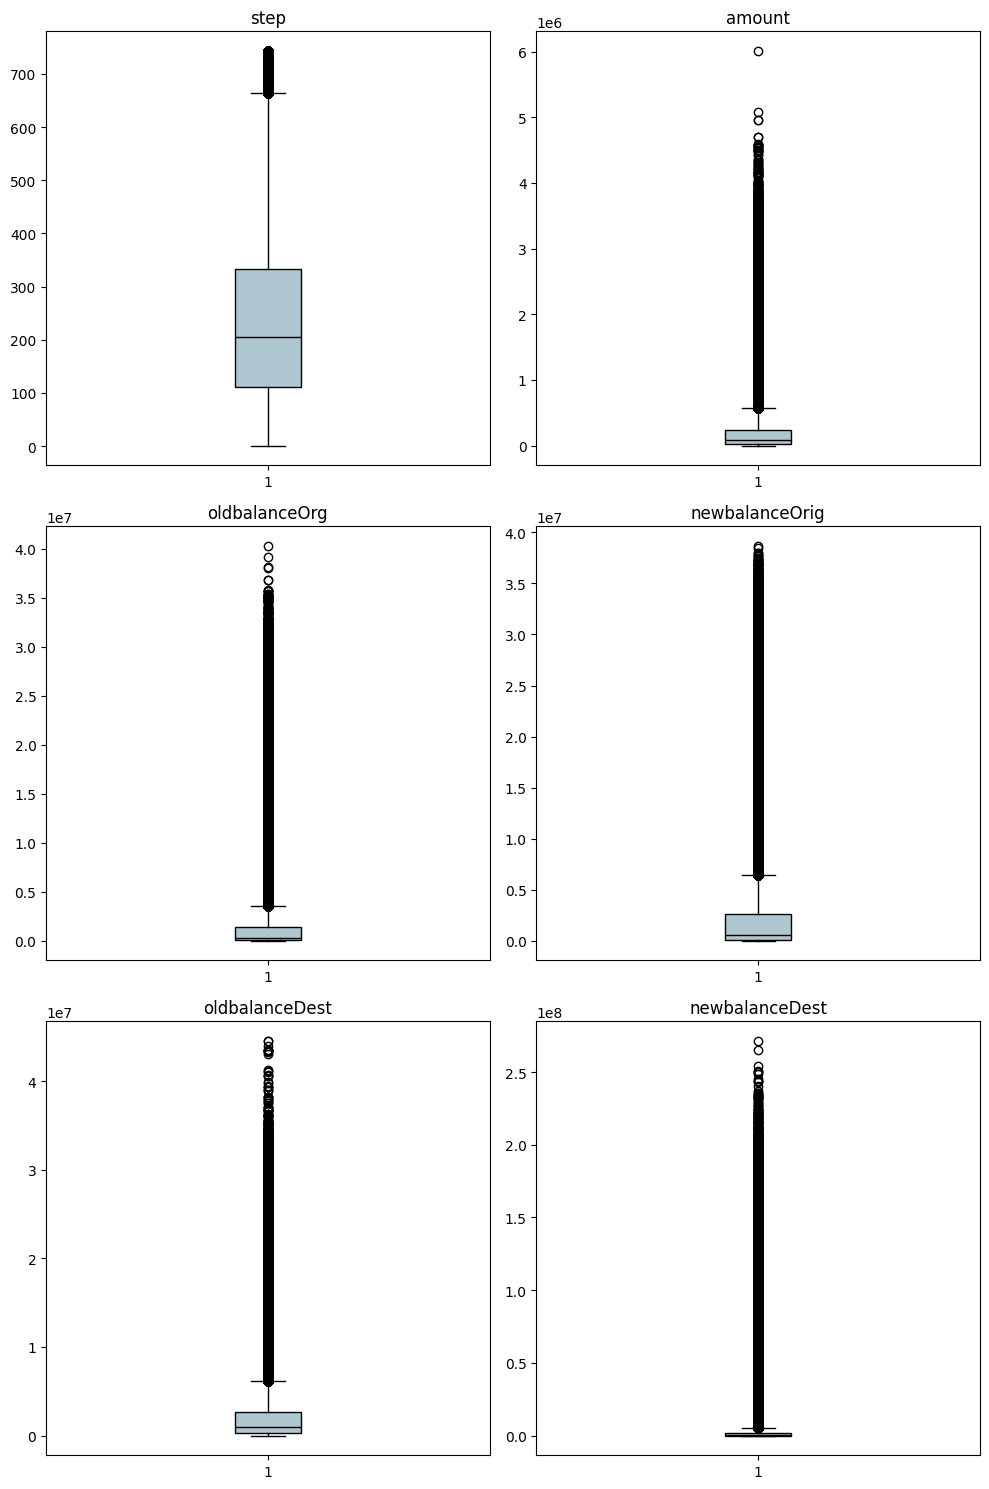

In [4]:
n_cols = 2
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df[col],
                    patch_artist=True,
                    boxprops=dict(facecolor="#AEC6CF", color="black"),
                    medianprops=dict(color="black", linewidth=1),
                    whiskerprops=dict(color="black"),
                    capprops=dict(color="black"))
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### 3.4. Save Dataset After Outlier Inspection

After verifying the dataset, we save it again.
- No rows were removed, as all extreme values are valid for modeling.
- This ensures we preserve a full synthetic dataset for future analysis or modeling.

In [5]:
os.makedirs("./data/3/", exist_ok=True)
df.to_parquet("./data/3/df.parquet", index=False)

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

#### 4.1. Load Dataset for Model Training

We load the dataset that was previously cleaned and inspected for outliers.
This dataset is ready for splitting into features and target for supervised learning.

In [2]:
df = pd.read_parquet("./data/3/df.parquet")

#### 4.2. Define Features and Target

- `features` contains all columns except the target variable 'isFraud'.
- `target` is the 'isFraud' column, representing whether a transaction is fraudulent.

This separation is necessary for supervised machine learning models.

In [3]:
features = df.drop(columns="isFraud")
target = df["isFraud"]

#### 4.3. Split Data into Train, Validation, and Test Sets

We split the dataset into:
- Training set: used to train the model
- Validation set: used to tune hyperparameters and monitor performance
- Test set: used for final evaluation

Splitting details:
- 3% of data is initially separated into temporary set (`X_temp`) to create validation and test sets.
- Stratified splitting ensures that the proportion of fraud and non-fraud cases is preserved in all sets.
- Random state is fixed for reproducibility.

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.03, stratify=target, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

#### 4.4. Handle Class Imbalance with Random Under-Sampling

Fraud detection datasets are highly imbalanced (fraud cases are rare).
We apply RandomUnderSampler to balance the training set:
- Reduces the number of non-fraud cases to match the number of fraud cases
- Ensures the model does not become biased towards the majority class
- Only applied to the training set; validation and test sets remain unchanged

Note:
- We choose under-sampling instead of techniques like SMOTE because the dataset is very large (21 million rows),
  so reducing the majority class still leaves enough data for training.
- After under-sampling, the training set contains 53,292 rows, which is sufficient for model learning.

In [5]:
undersampler = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [6]:
df_train = X_train.copy()
df_train["isFraud"] = y_train

df_val = X_val.copy()
df_val["isFraud"] = y_val

df_test = X_test.copy()
df_test["isFraud"] = y_test

#### 4.5. Verify Distribution in Train, Validation, and Test Sets

We print the number of fraud and non-fraud cases in each dataset:
- Confirms class distribution after under-sampling
- Ensures stratification worked correctly
- Helps assess if the dataset is balanced and ready for modeling

In [7]:
for name, df_set in [("Train", df_train), ("Validation", df_val), ("Test", df_test)]:
    counts = df_set["isFraud"].value_counts()
    n_non_fraud = counts.get(0, 0)
    n_fraud = counts.get(1, 0)
    total_rows = len(df_set)
    print(
        f"{name}:\n"
        f"- {total_rows:,} rows\n"
        f"- {n_fraud:,} fraud cases and {n_non_fraud:,} non-fraud cases\n"
        f"- {n_fraud/total_rows:.2%} fraud, {n_non_fraud/total_rows:.2%} non-fraud\n"
    )

Train:
- 53,292 rows
- 26,646 fraud cases and 26,646 non-fraud cases
- 50.00% fraud, 50.00% non-fraud

Validation:
- 315,000 rows
- 412 fraud cases and 314,588 non-fraud cases
- 0.13% fraud, 99.87% non-fraud

Test:
- 315,000 rows
- 412 fraud cases and 314,588 non-fraud cases
- 0.13% fraud, 99.87% non-fraud



#### 4.6. Save Prepared Datasets

We save the train, validation, and test sets as Parquet files:
- Makes it easy to reload for model training or evaluation
- Preserves data types and structure
- Ensures reproducibility of experiments

In [8]:
os.makedirs("./data/4/", exist_ok=True)

df_train.to_parquet("./data/4/df_train.parquet", index=False)
df_val.to_parquet("./data/4/df_val.parquet", index=False)
df_test.to_parquet("./data/4/df_test.parquet", index=False)

In [1]:
import os
import pandas as pd
from tqdm import tqdm

#### 5.1. Load Train, Validation, and Test Sets

We load the previously prepared datasets from Parquet files.
These sets have already been cleaned, split, and balanced, and are ready for feature engineering.

In [2]:
df_train = pd.read_parquet("./data/4/df_train.parquet")
df_test = pd.read_parquet("./data/4/df_test.parquet")
df_val = pd.read_parquet("./data/4/df_val.parquet")

#### 5.2. Feature Engineering for Transactions

The `preprocess_transactions` function generates new features to help the model detect fraud.
Features are designed to capture important patterns and behaviors in financial transactions.

Types of features created:
- **Transaction amount features:** ratios of transaction amount to sender/recipient balances
- **Time-based features:** hour, day, weekend/weekday, night, time since last transaction
- **Sender/recipient behavior features:** transaction counts, totals, maximum amounts, heavy recipients
- **Balance consistency checks:** errors between expected and observed balances
- **Transaction type features:** encoded type, type interactions with amount or fraud flags
- **Rolling statistics:** moving averages, standard deviations, and maximums over recent transactions

These features enrich the dataset with behavioral and temporal patterns that are useful for fraud detection.

A progress bar is used to monitor feature calculation.
It shows the current feature being calculated and overall progress.
This is helpful for large datasets to keep track of long-running preprocessing.

Original identifier columns (`nameOrig`, `nameDest`) are dropped to avoid overfitting.
Transaction type column (`type`) is one-hot encoded to convert categorical data into numeric format.
All remaining columns are ensured to be numeric and clipped to avoid extreme values.

In [3]:
def preprocess_transactions(df):
    df = df.sort_values(["nameOrig", "step"]).reset_index(drop=True)
    
    new_columns = [
        "delta_sender", "delta_recipient", "abs_delta_sender", "abs_delta_recipient", "delta_net",
        "amount_over_old", "amount_over_new", "amount_over_total", "amount_over_net_balance",
        "type_encoded", "type_times_amount", "type_flag_amount",
        "high_amount_flag", "large_tx", "hour", "day", "is_weekend", "is_night", "sender_receiver_same",
        "amount_over_mean_sender", "sender_tx_count", "sender_total_amount", "sender_max_amount", "amount_over_sender_max",
        "time_since_last_tx", "time_until_next_tx", "mean_time_between_tx", "time_gap_dev",
        "recipient_tx_count", "recipient_total_received", "recipient_heavy",
        "balance_sender_error", "abs_balance_sender_error", "balance_recipient_error", "abs_balance_recipient_error", "balance_error_total",
        "is_cash", "is_transfer", "is_logical_inconsistent",
        "rolling_mean_3", "rolling_std_3", "rolling_max_3"
    ]
    
    pbar = tqdm(total=len(new_columns), desc="Calculating features", ncols=120)
    
    def update(col_name):
        pbar.set_postfix_str(f"Current: {col_name}")
        pbar.update(1)

    df["delta_sender"] = df["oldbalanceOrg"] - df["newbalanceOrig"]; update("delta_sender")
    df["delta_recipient"] = df["newbalanceDest"] - df["oldbalanceDest"]; update("delta_recipient")
    df["abs_delta_sender"] = df["delta_sender"].abs(); update("abs_delta_sender")
    df["abs_delta_recipient"] = df["delta_recipient"].abs(); update("abs_delta_recipient")
    df["delta_net"] = (df["newbalanceOrig"] - df["oldbalanceOrg"]) + (df["newbalanceDest"] - df["oldbalanceDest"]); update("delta_net")

    df["amount_over_old"] = df["amount"] / (df["oldbalanceOrg"] + 1); update("amount_over_old")
    df["amount_over_new"] = df["amount"] / (df["newbalanceOrig"] + 1); update("amount_over_new")
    df["amount_over_total"] = df["amount"] / (df["oldbalanceOrg"] + df["oldbalanceDest"] + 1); update("amount_over_total")
    df["amount_over_net_balance"] = df["amount"] / (df["newbalanceOrig"] + df["newbalanceDest"] + 1); update("amount_over_net_balance")

    type_mean = df.groupby("type")["isFraud"].mean()
    df["type_encoded"] = df["type"].map(type_mean); update("type_encoded")
    df["type_times_amount"] = df["type_encoded"] * df["amount"]; update("type_times_amount")
    df["type_flag_amount"] = df["type_encoded"] * df["isFlaggedFraud"] * df["amount"]; update("type_flag_amount")

    df["high_amount_flag"] = df["isFlaggedFraud"] * df["amount"]; update("high_amount_flag")
    df["large_tx"] = (df["amount"] > 0.5 * df["oldbalanceOrg"]).astype(int); update("large_tx")

    df["hour"] = df["step"] % 24; update("hour")
    df["day"] = df["step"] // 24; update("day")
    df["is_weekend"] = (df["day"] % 7).isin([5,6]).astype(int); update("is_weekend")
    df["is_night"] = ((df["hour"] >= 22) | (df["hour"] < 6)).astype(int); update("is_night")

    df["sender_receiver_same"] = (df["nameOrig"] == df["nameDest"]).astype(int); update("sender_receiver_same")

    grp_sender = df.groupby("nameOrig")["amount"]
    df["amount_over_mean_sender"] = df["amount"] / (grp_sender.transform("mean") + 1); update("amount_over_mean_sender")
    df["sender_tx_count"] = grp_sender.transform("count"); update("sender_tx_count")
    df["sender_total_amount"] = grp_sender.transform("sum"); update("sender_total_amount")
    df["sender_max_amount"] = grp_sender.transform("max"); update("sender_max_amount")
    df["amount_over_sender_max"] = df["amount"] / (grp_sender.transform("max") + 1); update("amount_over_sender_max")
    df["time_since_last_tx"] = df.groupby("nameOrig")["step"].diff().fillna(-1); update("time_since_last_tx")
    df["time_until_next_tx"] = df.groupby("nameOrig")["step"].diff(-1).abs().fillna(-1); update("time_until_next_tx")
    df["mean_time_between_tx"] = grp_sender.transform(lambda x: x.diff().clip(lower=0).mean()); update("mean_time_between_tx")
    df["time_gap_dev"] = df["time_since_last_tx"] - df["mean_time_between_tx"]; update("time_gap_dev")

    grp_rec = df.groupby("nameDest")["amount"]
    df["recipient_tx_count"] = grp_rec.transform("count"); update("recipient_tx_count")
    df["recipient_total_received"] = grp_rec.transform("sum"); update("recipient_total_received")
    df["recipient_heavy"] = (df["recipient_tx_count"] > df["recipient_tx_count"].median()).astype(int); update("recipient_heavy")

    df["balance_sender_error"] = (df["oldbalanceOrg"] - df["amount"]) - df["newbalanceOrig"]; update("balance_sender_error")
    df["abs_balance_sender_error"] = df["balance_sender_error"].abs(); update("abs_balance_sender_error")
    df["balance_recipient_error"] = (df["oldbalanceDest"] + df["amount"]) - df["newbalanceDest"]; update("balance_recipient_error")
    df["abs_balance_recipient_error"] = df["balance_recipient_error"].abs(); update("abs_balance_recipient_error")
    df["balance_error_total"] = df["abs_balance_sender_error"] + df["abs_balance_recipient_error"]; update("balance_error_total")

    df["is_cash"] = df["type"].isin(["CASH_OUT","CASH_IN"]).astype(int); update("is_cash")
    df["is_transfer"] = df["type"].isin(["TRANSFER"]).astype(int); update("is_transfer")
    df["is_logical_inconsistent"] = ((df["oldbalanceOrg"]==0)&(df["amount"]>0)) | \
                                    (df["newbalanceOrig"]<0) | \
                                    ((df["oldbalanceDest"]==0)&(df["amount"]>0)) | \
                                    (df["oldbalanceOrg"]-df["amount"] != df["newbalanceOrig"]); update("is_logical_inconsistent")

    window = 3
    df["rolling_mean_3"] = grp_sender.transform(lambda x: x.rolling(window, min_periods=1).mean()); update("rolling_mean_3")
    df["rolling_std_3"] = grp_sender.transform(lambda x: x.rolling(window, min_periods=1).std().fillna(0)); update("rolling_std_3")
    df["rolling_max_3"] = grp_sender.transform(lambda x: x.rolling(window, min_periods=1).max()); update("rolling_max_3")

    df.drop(columns=["nameDest","nameOrig"], inplace=True)
    df = pd.get_dummies(df, columns=["type"], drop_first=False)
    df = df.select_dtypes(include="number").astype(float)

    pbar.close()
    return df.clip(-1e10,1e10)

#### 5.3. Apply Feature Engineering

We apply the preprocessing function to train, validation, and test datasets.
This ensures that all datasets have the same features and are ready for modeling.

In [4]:
df_train = preprocess_transactions(df_train)
df_test = preprocess_transactions(df_test)
df_val = preprocess_transactions(df_val)

Calculating features: 100%|█████████████████████████████████████| 42/42 [06:22<00:00,  9.11s/it, Current: rolling_max_3]


#### 5.4. Save Preprocessed Datasets

The newly engineered datasets are saved as Parquet files for future use:
- Preserves all calculated features
- Ensures reproducibility
- Ready for model training and evaluation

In [5]:
os.makedirs("./data/5/", exist_ok=True)

df_train.to_parquet("./data/5/df_train.parquet", index=False)
df_val.to_parquet("./data/5/df_val.parquet", index=False)
df_test.to_parquet("./data/5/df_test.parquet", index=False)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler

#### 6.1. Load Preprocessed Datasets

We load the train, validation, and test sets that have undergone feature engineering.
These datasets are ready for feature selection and model training.

In [2]:
df_train = pd.read_parquet("./data/5/df_train.parquet")
df_test = pd.read_parquet("./data/5/df_test.parquet")
df_val = pd.read_parquet("./data/5/df_val.parquet")

#### 6.2. Remove Low-Variance Features

Columns with very low variance contribute little to model learning and can be safely removed.
- `VarianceThreshold` removes features with variance below 0.01.
- We print the removed columns and their variances for transparency.
- The remaining columns are kept for further analysis.

In [3]:
variance_selector = VarianceThreshold(threshold=0.01)
variance_selector.fit(df_train)

variances = pd.Series(variance_selector.variances_, index=df_test.columns)
keep_columns = variances[variance_selector.get_support()].index
drop_columns = variances[~variance_selector.get_support()].index

print("Columns with low variance (< 0.01):")
for col in drop_columns.sort_values(key=lambda x: variances[x]):
    print(f"  - {col} (variance = {variances[col]:.6f})")

df_train, df_test, df_val = df_train[keep_columns], df_test[keep_columns], df_val[keep_columns]

Columns with low variance (< 0.01):
  - sender_receiver_same (variance = 0.000000)
  - isFlaggedFraud (variance = 0.000019)
  - type_encoded (variance = 0.000055)
  - amount_over_sender_max (variance = 0.003177)
  - amount_over_mean_sender (variance = 0.004138)
  - sender_tx_count (variance = 0.004894)


#### 6.3. Prepare Features and Target

- `X_train` contains all numeric features except the target `isFraud`.
- `y_train` is the target variable for fraud detection.
- We also extract the list of numeric columns to use in statistical feature selection methods.

In [4]:
X_train, y_train = df_train.drop(columns=["isFraud"]), df_train["isFraud"]
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()

#### 6.4. Statistical Feature Selection

We evaluate the importance of numeric features using multiple statistical methods:
1. **Mutual Information (MI)** – measures the dependency between each feature and the target.
2. **Chi-squared Test (Chi2)** – evaluates the independence between categorical features and the target.
3. **ANOVA F-test (F-test)** – assesses whether feature means differ significantly across target classes.
4. **Correlation** – absolute correlation of each feature with the target.

- Scores are normalized to a 0-1 range to allow comparison across methods.
- A combined score is calculated as the mean of all normalized scores.

We create a horizontal bar plot comparing the normalized scores from different feature selection methods:
- Each feature is represented on the y-axis.
- Each statistical test score is shown as a separate bar with different colors.
- Values are annotated on the bars for clarity.

This visualization helps identify features that consistently perform well across multiple selection criteria.
It provides an intuitive way to prioritize features for model training.

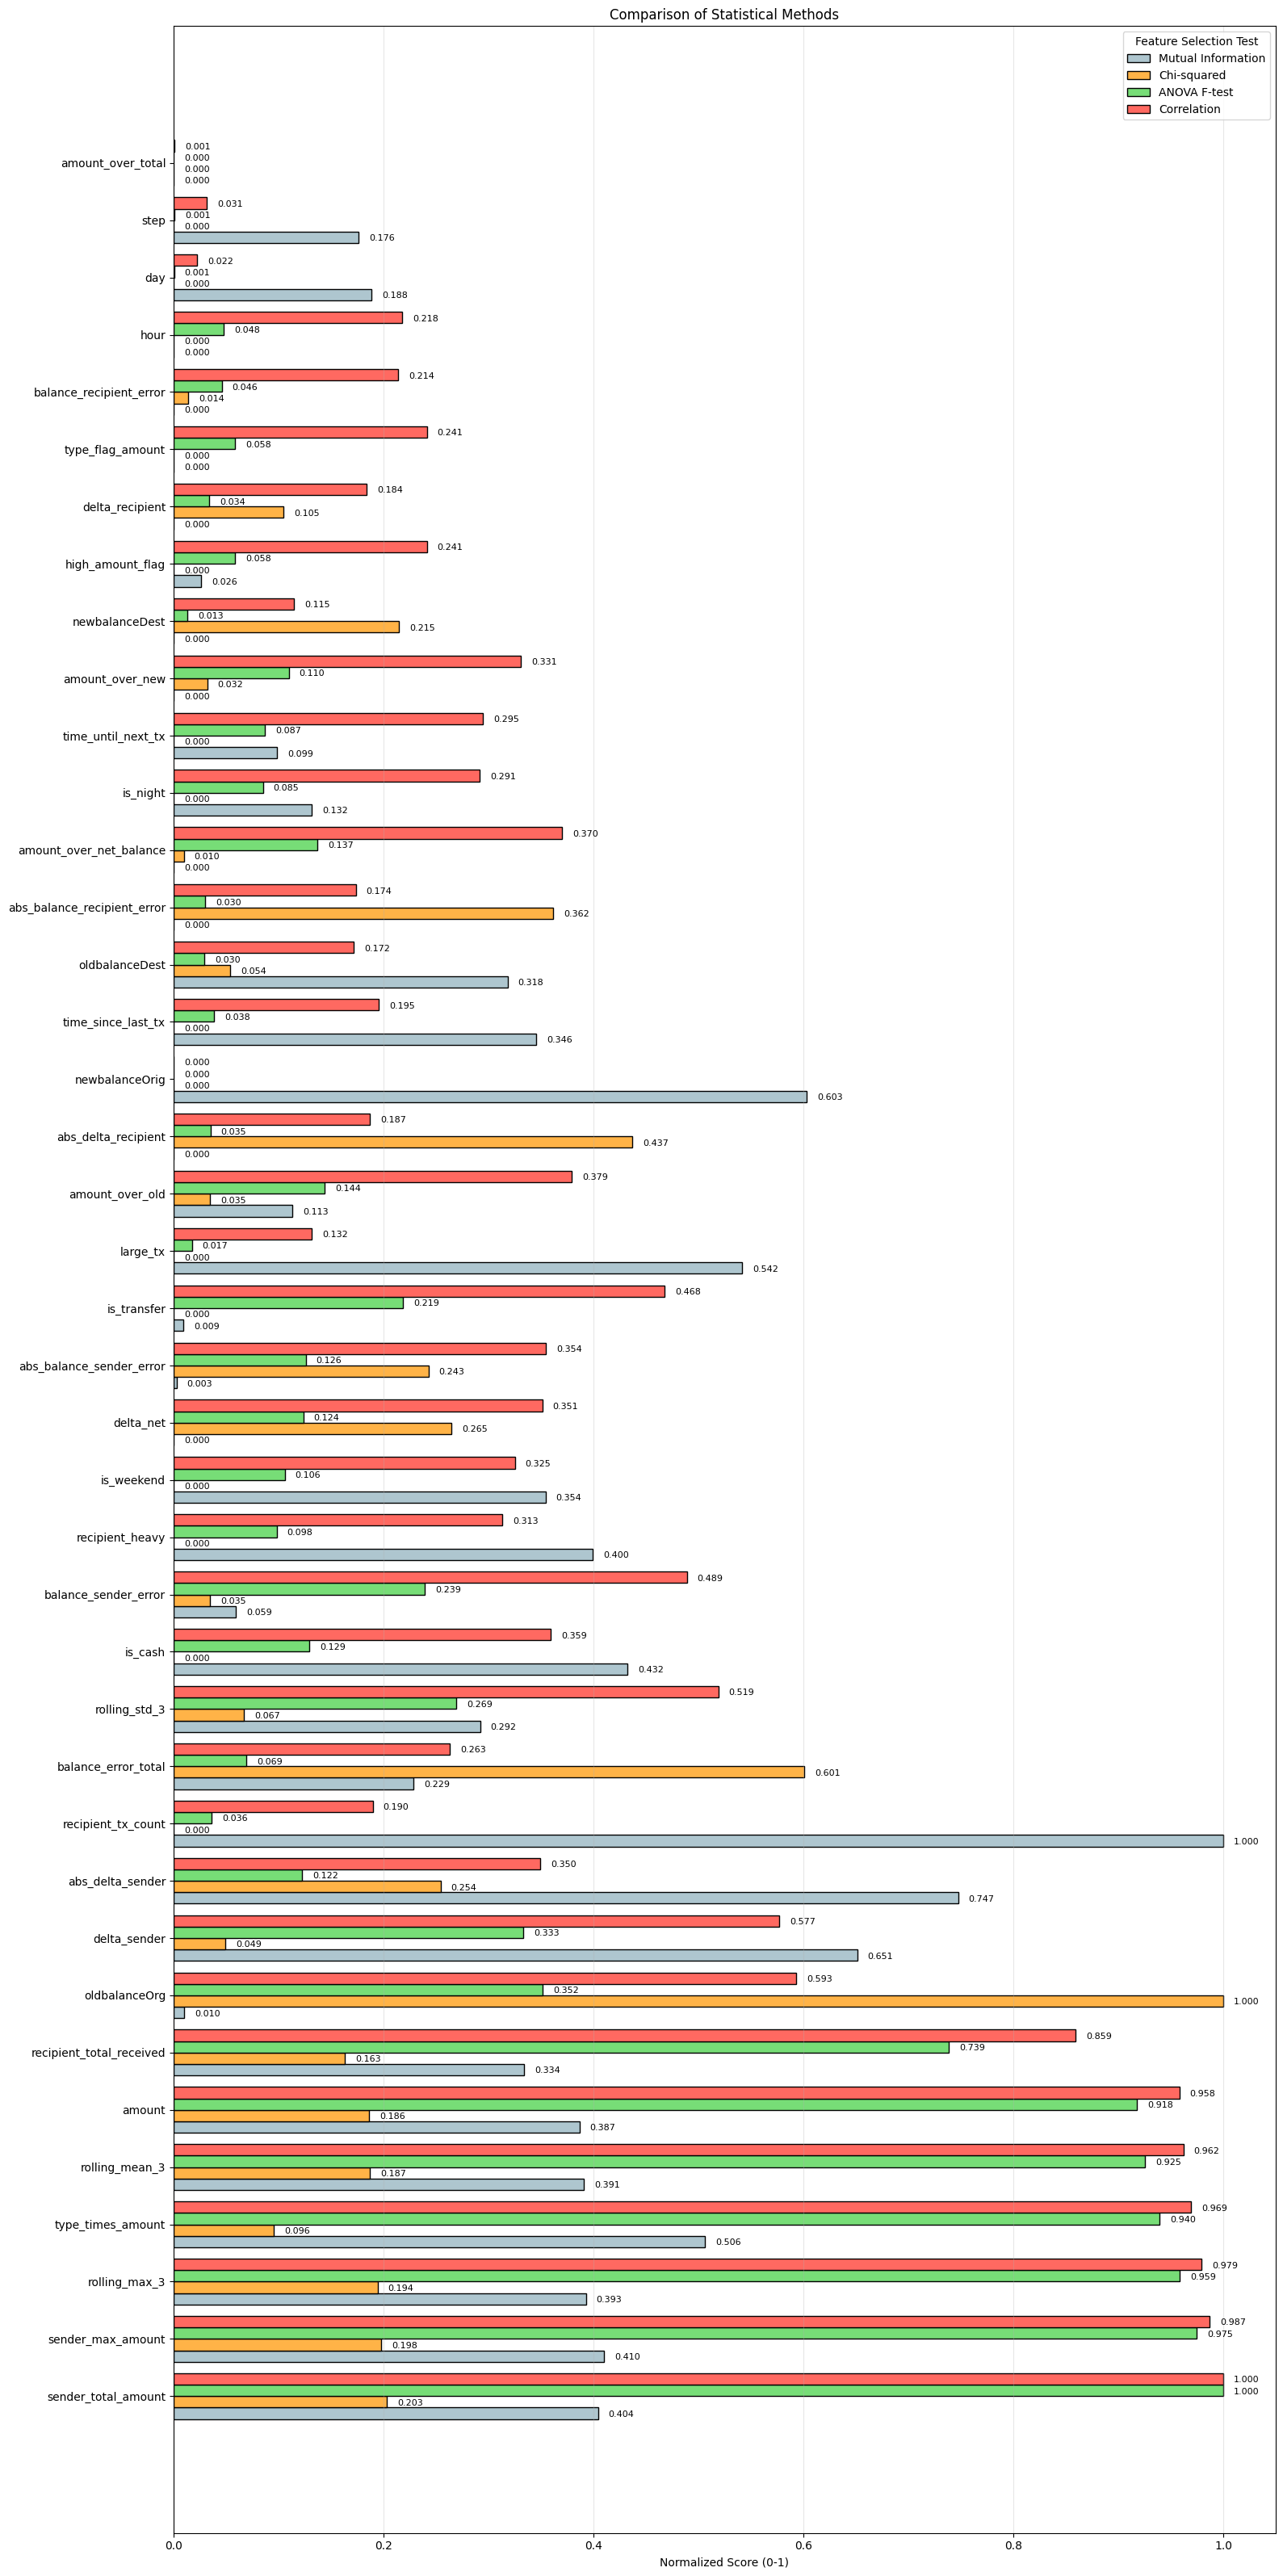

In [5]:
mi_scores = mutual_info_classif(X_train[numeric_cols], y_train, random_state=0)
chi_scores, _ = chi2(X_train[numeric_cols]-X_train[numeric_cols].min(), y_train)
f_scores, _ = f_classif(X_train[numeric_cols], y_train)
corr_scores = X_train[numeric_cols].corrwith(y_train).abs()

scores = pd.DataFrame({
    "Feature": numeric_cols,
    "Mutual Information": mi_scores,
    "Chi-squared": chi_scores,
    "ANOVA F-test": f_scores,
    "Correlation": corr_scores
})

scaler = MinMaxScaler()
score_columns = ["Mutual Information", "Chi-squared", "ANOVA F-test", "Correlation"]
scores[score_columns] = scaler.fit_transform(scores[score_columns])
scores["Combined"] = scores[score_columns].mean(axis=1)
scores_sorted = scores.sort_values("Combined", ascending=False)

num_features = len(scores_sorted)
y_positions = np.arange(num_features)
width = 0.2
colors = ["#AEC6CF", "#FFB347", "#77DD77", "#FF6961"]
labels = score_columns

plt.figure(figsize=(16, 0.8*num_features))
bars_list = []
for i, (label, color) in enumerate(zip(labels, colors)):
    bars_list.append(plt.barh(
        y_positions + (i-1.5)*width,
        scores_sorted[label],
        width,
        label=label,
        color=color,
        edgecolor="black"
    ))

for i, label in enumerate(labels):
    for bar, val in zip(bars_list[i], scores_sorted[label]):
        plt.text(bar.get_width()+0.01, bar.get_y()+bar.get_height()/2-0.02, f"{val:.3f}", va="center", fontsize=8)

plt.yticks(y_positions, scores_sorted["Feature"])
plt.xlabel("Normalized Score (0-1)")
plt.title("Comparison of Statistical Methods")
plt.grid(axis="x", alpha=0.3)
plt.legend(title="Feature Selection Test")
plt.tight_layout()
plt.show()

#### 6.5. Save Feature-Selected Datasets

After low-variance removal and feature evaluation, we save the updated datasets:
- Preserves selected features for train, validation, and test sets
- Ensures reproducibility for model training

In [6]:
os.makedirs("./data/6/", exist_ok=True)

df_train.to_parquet("./data/6/df_train.parquet", index=False)
df_val.to_parquet("./data/6/df_val.parquet", index=False)
df_test.to_parquet("./data/6/df_test.parquet", index=False)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

#### 7.1. Load Preprocessed Datasets

We load the preprocessed datasets generated in the previous step.  
At this stage, low-variance features and irrelevant statistical features have already been removed, so the dataset now contains a refined set of predictors suitable for model-based feature importance estimation.

In [2]:
df_train = pd.read_parquet("./data/6/df_train.parquet")
df_test = pd.read_parquet("./data/6/df_test.parquet")
df_val = pd.read_parquet("./data/6/df_val.parquet")

#### 7.2. Prepare Features and Target

We separate the target (`isFraud`) from the feature matrix.  
Tree-based models such as ExtraTrees can naturally handle heterogeneous numerical distributions and do not require scaling, making them a strong choice for feature importance analysis.

In [3]:
X_train, y_train = df_train.drop(columns="isFraud"), df_train["isFraud"]

#### 7.3. Train ExtraTreesClassifier for Feature Importance

We train an `ExtraTreesClassifier` with:
- **200 trees** for stability,
- **randomized splits** for robustness,
- **parallel processing** (`n_jobs = -1`) for efficiency.

ExtraTrees is well-suited for tabular data and provides reliable feature importance scores based on impurity reduction.

In [4]:
model = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False).reset_index(drop=True)

#### 7.4. Visualizing Feature Importances

We plot the feature importances in descending order.  
A horizontal bar chart is used because feature names may be long and this layout improves readability.

Each bar is annotated with its exact importance score, and the x-axis is extended slightly (15%) to avoid text overlap.  
This visualization highlights which features contribute the most to fraud detection.

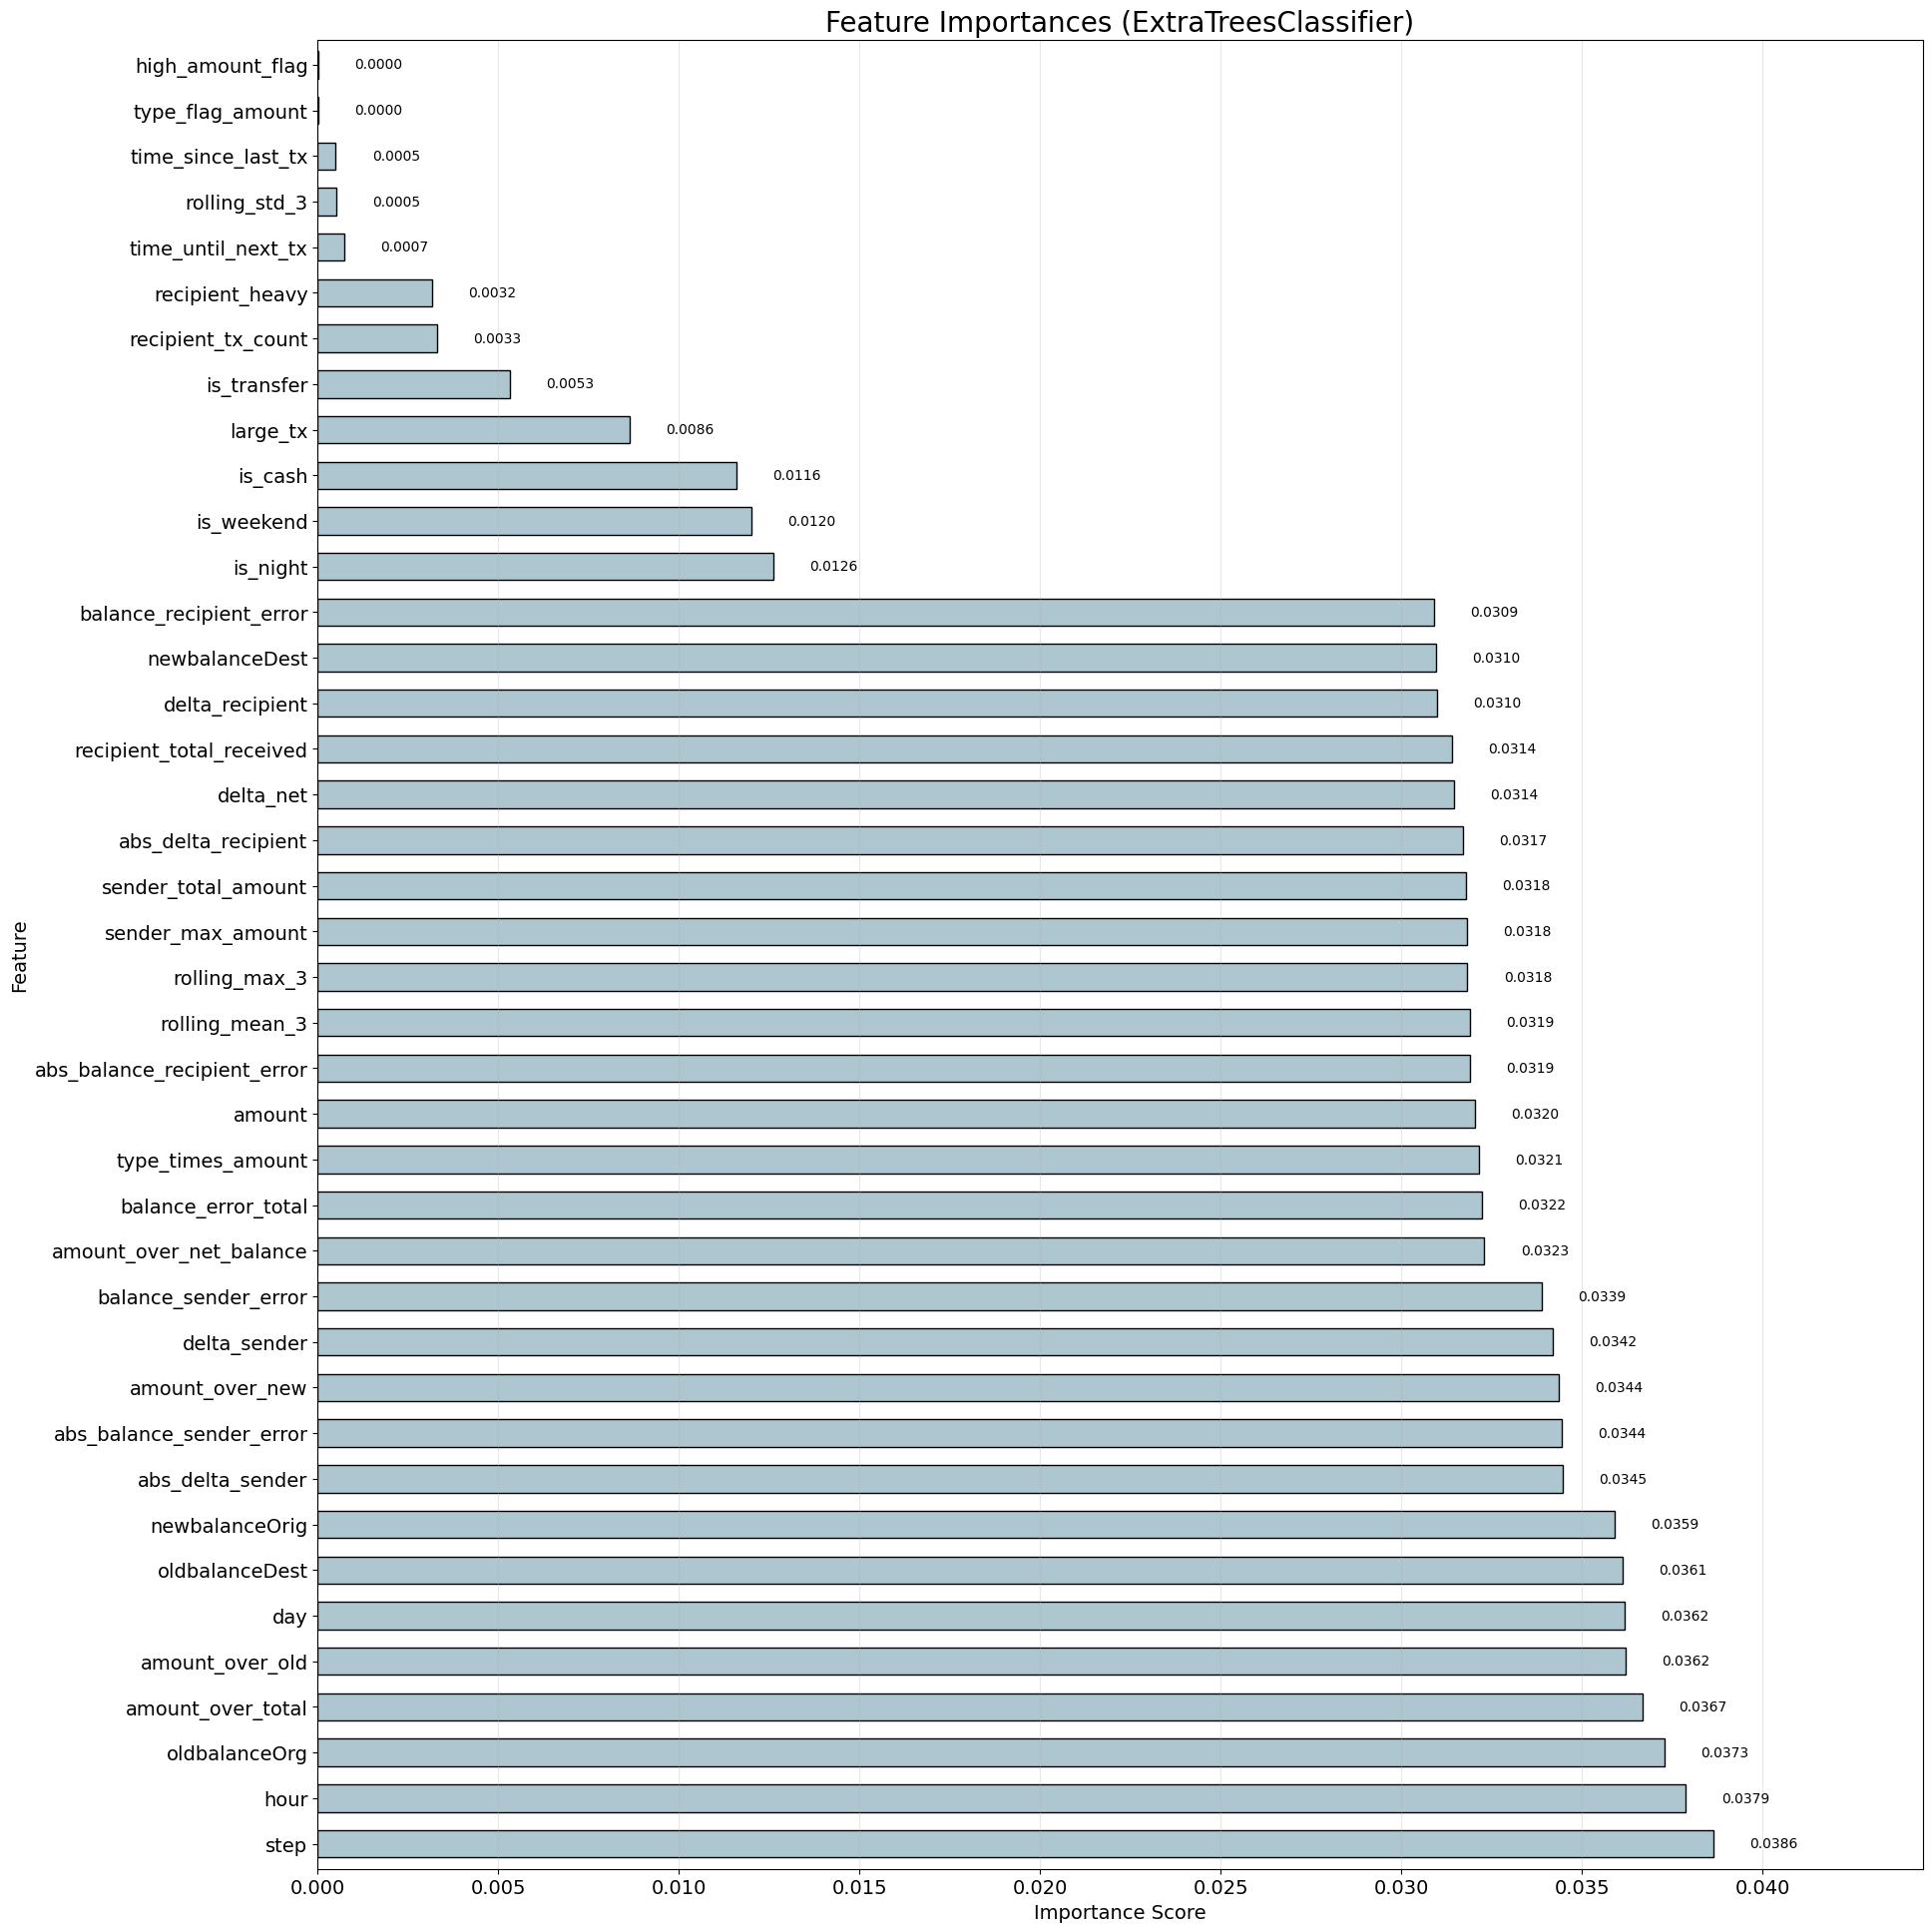

In [5]:
fig, ax = plt.subplots(figsize=(20, len(feature_importances)*0.5))

feature_importances.plot(
    x="Feature",
    y="Importance",
    kind="barh",
    color="#AEC6CF",
    legend=False,
    width=0.6,
    fontsize=14,
    edgecolor="black",
    ax=ax
)

plt.xlim(0, feature_importances["Importance"].max() * 1.15)

for i, val in enumerate(feature_importances["Importance"]):
    ax.text(val + 0.001, i, f"{val:.4f}", fontsize=10, va="center")

plt.title("Feature Importances (ExtraTreesClassifier)", fontsize=20)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout(pad=3.0)
plt.grid(axis="x", alpha=0.3)
plt.show()

#### 7.5. Save Processed Datasets

We export the updated datasets into a new directory (`./data/7/`).  
This keeps a clear versioned structure across preprocessing steps and ensures consistency for downstream notebooks.

In [6]:
os.makedirs("./data/7/", exist_ok=True)

df_train.to_parquet("./data/7/df_train.parquet", index=False)
df_val.to_parquet("./data/7/df_val.parquet", index=False)
df_test.to_parquet("./data/7/df_test.parquet", index=False)

In [1]:
import os
import pandas as pd

#### 8.1. Load Latest Feature-Selected Datasets

We load the datasets from the previous step (step 7) where model-based feature importances were calculated.  
These datasets already contain only relevant features selected based on the ExtraTreesClassifier analysis.

In [2]:
df_train = pd.read_parquet("./data/7/df_train.parquet")
df_test = pd.read_parquet("./data/7/df_test.parquet")
df_val = pd.read_parquet("./data/7/df_val.parquet")

#### 8.2. Select Top Features for Modeling

We manually select a subset of features based on their importance scores and relevance for fraud detection.  
This step reduces dimensionality and focuses the model on the most informative predictors.

In [3]:
selected_columns = [
    "step", "hour", "oldbalanceOrg", "amount_over_total", "amount_over_old",
    "day", "oldbalanceDest", "newbalanceOrig", "abs_delta_sender",
    "abs_balance_sender_error", "amount_over_new", "delta_sender", "balance_sender_error", "isFraud"
]

df_train = df_train[selected_columns]
df_test = df_test[selected_columns]
df_val = df_val[selected_columns]

#### 8.3. Save Reduced Datasets

We save the train, validation, and test sets containing only the selected top features into a new directory (`./data/8/`).  
This ensures that all downstream modeling uses the same curated set of important features.

In [4]:
os.makedirs("./data/8/", exist_ok=True)

df_train.to_parquet("./data/8/df_train.parquet", index=False)
df_val.to_parquet("./data/8/df_val.parquet", index=False)
df_test.to_parquet("./data/8/df_test.parquet", index=False)

In [4]:
import os
import pandas as pd
from sklearn.preprocessing import RobustScaler

#### 9.1. Load Feature-Selected Datasets

We load the datasets from step 8, which contain only the top features selected based on importance analysis.  
At this point, the datasets are reduced in dimensionality and ready for scaling and modeling.

In [5]:
df_train = pd.read_parquet("./data/8/df_train.parquet")
df_test = pd.read_parquet("./data/8/df_test.parquet")
df_val = pd.read_parquet("./data/8/df_val.parquet")

#### 9.2. Separate Features and Target

We split each dataset into:
- **X**: the feature matrix containing predictors  
- **y**: the target column `isFraud`  

This separation is required before applying scaling and feeding the data into models.

In [6]:
feature_cols = df_train.columns.drop("isFraud")
X_train, y_train = df_train[feature_cols], df_train["isFraud"]
X_val, y_val = df_val[feature_cols], df_val["isFraud"]
X_test, y_test = df_test[feature_cols], df_test["isFraud"]

#### 9.3. Scale Features Using RobustScaler

We apply `RobustScaler` to normalize the features:
- Robust to outliers, which is important for financial datasets with high-value transactions
- Scales the data using median and interquartile range instead of mean and standard deviation

We fit the scaler on the training set and apply it to validation and test sets to avoid data leakage.

In [7]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=feature_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_cols)

X_train["isFraud"] = y_train
X_test["isFraud"] = y_test
X_val["isFraud"] = y_val

#### 9.4. Add Target Column Back and Save Scaled Datasets

After scaling, we add the `isFraud` column back to each dataset to maintain a complete DataFrame.  
Finally, the scaled datasets are saved into `./data/9/` for consistent use in downstream modeling.

In [8]:
os.makedirs("./data/9/", exist_ok=True)

X_train.to_parquet("./data/9/df_train.parquet", index=False)
X_val.to_parquet("./data/9/df_val.parquet", index=False)
X_test.to_parquet("./data/9/df_test.parquet", index=False)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor

#### 10.1. Load Scaled Datasets

We load the scaled datasets from step 9.  
These datasets contain only the selected features, scaled using `RobustScaler`, and are ready for model training and evaluation.

In [2]:
df_train = pd.read_parquet("./data/9/df_train.parquet")
df_test = pd.read_parquet("./data/9/df_test.parquet")
df_val = pd.read_parquet("./data/9/df_val.parquet")

#### 10.1. Separate Features and Target

We split each dataset into:
- **X**: the feature matrix containing predictors
- **y**: the target column `isFraud`

This allows us to pass the features and labels separately to machine learning models and evaluation functions.

In [3]:
feature_cols = df_train.columns.drop("isFraud")
X_train, y_train = df_train[feature_cols], df_train["isFraud"]
X_val, y_val = df_val[feature_cols], df_val["isFraud"]
X_test, y_test = df_test[feature_cols], df_test["isFraud"]

#### 10.2. Define Model Evaluation Function

The `evaluate_model` function performs a comprehensive evaluation for supervised models:
- Predicts labels and probabilities
- Computes accuracy, precision, recall, F1-score, and ROC-AUC
- Prints a detailed classification report
- Plots a confusion matrix for visual inspection of performance

This function can be reused for training, validation, or test datasets.

In [4]:
def evaluate_model(model, X, y, title="Dataset"):
    """Evaluate model performance on a given dataset."""
    preds = model.predict(X)
    proba = model.predict_proba(X)[:, 1]

    print("\n-------------------------------------------")
    print(f"Evaluation on: {title}")
    print("-------------------------------------------")
    print(f"Accuracy:       {accuracy_score(y, preds):.4f}")
    print(f"Precision:      {precision_score(y, preds):.4f}")
    print(f"Recall:         {recall_score(y, preds):.4f}")
    print(f"F1-score:       {f1_score(y, preds):.4f}")
    print(f"ROC-AUC:        {roc_auc_score(y, proba):.4f}")

    print("\nClassification report:")
    print(classification_report(y, preds, digits=4))

    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

#### 10.3. Define Local Outlier Factor (LOF) Evaluation Function

The `evaluate_lof` function adapts the Local Outlier Factor model for fraud detection:
- LOF outputs -1 for outliers, which we interpret as potential fraud
- Converts LOF predictions into binary labels
- Computes standard classification metrics (accuracy, precision, recall, F1, ROC-AUC)
- Prints a classification report and plots a confusion matrix

This allows us to compare unsupervised anomaly detection methods to supervised classifiers.

In [5]:
def evaluate_lof(model, X, y, title="Dataset"):
    preds_lof = model.predict(X)
    
    preds = np.where(preds_lof == -1, 1, 0)
    
    scores = -model.decision_function(X)
    
    print("\n-------------------------------------------")
    print(f"Evaluation on: {title}")
    print("-------------------------------------------")
    print(f"Accuracy:       {accuracy_score(y, preds):.4f}")
    print(f"Precision:      {precision_score(y, preds, zero_division=0):.4f}")
    print(f"Recall:         {recall_score(y, preds, zero_division=0):.4f}")
    print(f"F1-score:       {f1_score(y, preds, zero_division=0):.4f}")
    print(f"ROC-AUC:        {roc_auc_score(y, scores):.4f}")
    
    print("\nClassification report:")
    print(classification_report(y, preds, digits=4, zero_division=0))
    
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

#### 10.4. Random Forest Classifier

We train a Random Forest model with the following hyperparameters:
- `n_estimators=200`: number of trees in the forest
- `max_depth=10`: maximum depth of each tree to prevent overfitting
- `min_samples_split=5` and `min_samples_leaf=3`: control tree growth
- `max_features='sqrt'`: uses square root of features for each split
- `random_state=42` and `n_jobs=-1`: for reproducibility and parallel computation

After training, we evaluate performance on both the training and test sets using the `evaluate_model` function.


-------------------------------------------
Evaluation on: Training Set
-------------------------------------------
Accuracy:       0.7041
Precision:      0.7020
Recall:         0.7095
F1-score:       0.7057
ROC-AUC:        0.7894

Classification report:
              precision    recall  f1-score   support

         0.0     0.7064    0.6988    0.7025     26646
         1.0     0.7020    0.7095    0.7057     26646

    accuracy                         0.7041     53292
   macro avg     0.7042    0.7041    0.7041     53292
weighted avg     0.7042    0.7041    0.7041     53292



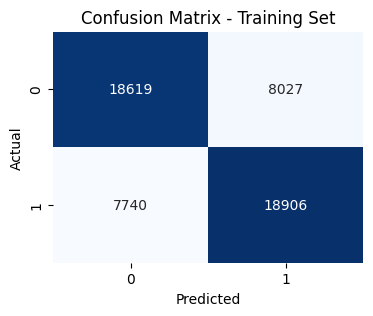


-------------------------------------------
Evaluation on: Test Set
-------------------------------------------
Accuracy:       0.5273
Precision:      0.0015
Recall:         0.5534
F1-score:       0.0031
ROC-AUC:        0.5682

Classification report:
              precision    recall  f1-score   support

         0.0     0.9989    0.5273    0.6902    314588
         1.0     0.0015    0.5534    0.0031       412

    accuracy                         0.5273    315000
   macro avg     0.5002    0.5403    0.3466    315000
weighted avg     0.9976    0.5273    0.6893    315000



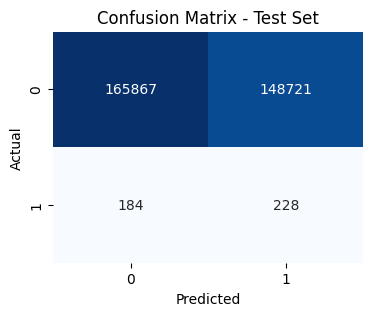

In [6]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

evaluate_model(model, X_train, y_train, title="Training Set")
evaluate_model(model, X_test, y_test, title="Test Set")

#### 10.5. XGBoost Classifier

We train an XGBoost model configured for tabular fraud detection:
- `n_estimators=200` and `max_depth=10` to control complexity
- `learning_rate=0.1` to balance speed and convergence
- `subsample=0.8` and `colsample_bytree=0.8` for regularization
- `eval_metric='logloss'` and `use_label_encoder=False` to comply with latest XGBoost version
- `random_state=42` and `n_jobs=-1` for reproducibility and parallelization

The model is then evaluated on training and test sets with `evaluate_model`.

c:\Users\nicol\Documents\ESILV\S9\Project #\python_env\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:34:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



-------------------------------------------
Evaluation on: XGBoost - Training Set
-------------------------------------------
Accuracy:       0.9601
Precision:      0.9596
Recall:         0.9606
F1-score:       0.9601
ROC-AUC:        0.9939

Classification report:
              precision    recall  f1-score   support

         0.0     0.9606    0.9595    0.9600     26646
         1.0     0.9596    0.9606    0.9601     26646

    accuracy                         0.9601     53292
   macro avg     0.9601    0.9601    0.9601     53292
weighted avg     0.9601    0.9601    0.9601     53292



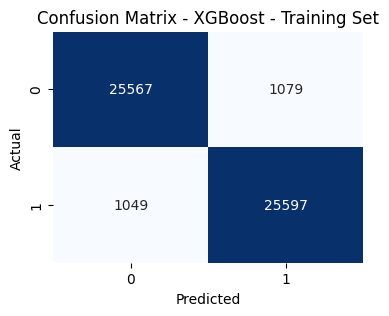


-------------------------------------------
Evaluation on: XGBoost - Test Set
-------------------------------------------
Accuracy:       0.5856
Precision:      0.0020
Recall:         0.6189
F1-score:       0.0039
ROC-AUC:        0.6529

Classification report:
              precision    recall  f1-score   support

         0.0     0.9991    0.5855    0.7384    314588
         1.0     0.0020    0.6189    0.0039       412

    accuracy                         0.5856    315000
   macro avg     0.5006    0.6022    0.3711    315000
weighted avg     0.9978    0.5856    0.7374    315000



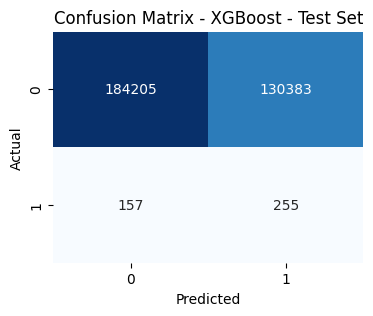

In [7]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

evaluate_model(xgb_model, X_train, y_train, title="XGBoost - Training Set")
evaluate_model(xgb_model, X_test, y_test, title="XGBoost - Test Set")

#### 10.5. LightGBM Classifier

We train a LightGBM classifier with similar settings:
- `n_estimators=200`, `max_depth=10`, and `num_leaves=31` control tree complexity
- `learning_rate=0.1`, `subsample=0.8`, and `colsample_bytree=0.8` reduce overfitting
- `random_state=42` and `n_jobs=-1` ensure reproducibility and parallel execution
- `verbose=-1` suppresses unnecessary output

Evaluation is performed on both training and test sets using `evaluate_model`.


-------------------------------------------
Evaluation on: LightGBM - Training Set
-------------------------------------------
Accuracy:       0.7252
Precision:      0.7235
Recall:         0.7290
F1-score:       0.7262
ROC-AUC:        0.8141

Classification report:
              precision    recall  f1-score   support

         0.0     0.7269    0.7214    0.7242     26646
         1.0     0.7235    0.7290    0.7262     26646

    accuracy                         0.7252     53292
   macro avg     0.7252    0.7252    0.7252     53292
weighted avg     0.7252    0.7252    0.7252     53292



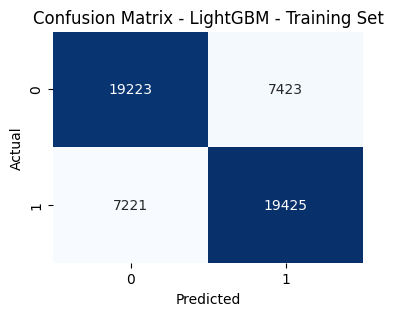


-------------------------------------------
Evaluation on: LightGBM - Test Set
-------------------------------------------
Accuracy:       0.5372
Precision:      0.0017
Recall:         0.5874
F1-score:       0.0033
ROC-AUC:        0.5771

Classification report:
              precision    recall  f1-score   support

         0.0     0.9990    0.5372    0.6987    314588
         1.0     0.0017    0.5874    0.0033       412

    accuracy                         0.5372    315000
   macro avg     0.5003    0.5623    0.3510    315000
weighted avg     0.9977    0.5372    0.6977    315000



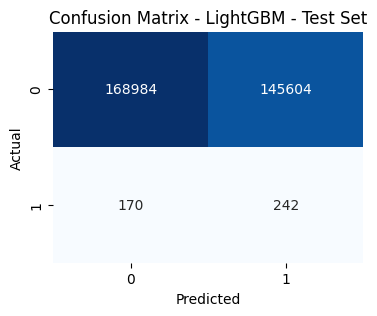

In [8]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb_model.fit(X_train, y_train)

evaluate_model(lgb_model, X_train, y_train, title="LightGBM - Training Set")
evaluate_model(lgb_model, X_test, y_test, title="LightGBM - Test Set")

#### 10.6. Logistic Regression

We train a logistic regression model for baseline comparison:
- `max_iter=1000` ensures convergence
- `class_weight='balanced'` compensates for class imbalance
- `solver='saga'` and `penalty='l2'` provide efficient optimization
- `random_state=42` and `n_jobs=-1` for reproducibility and speed

Performance is assessed on training and test sets with `evaluate_model`.


-------------------------------------------
Evaluation on: Logistic Regression - Training Set
-------------------------------------------
Accuracy:       0.5110
Precision:      0.5103
Recall:         0.5449
F1-score:       0.5270
ROC-AUC:        0.5154

Classification report:
              precision    recall  f1-score   support

         0.0     0.5118    0.4770    0.4938     26646
         1.0     0.5103    0.5449    0.5270     26646

    accuracy                         0.5110     53292
   macro avg     0.5110    0.5110    0.5104     53292
weighted avg     0.5110    0.5110    0.5104     53292



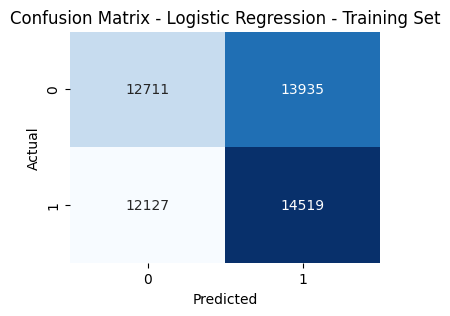


-------------------------------------------
Evaluation on: Logistic Regression - Test Set
-------------------------------------------
Accuracy:       0.4746
Precision:      0.0013
Recall:         0.5316
F1-score:       0.0026
ROC-AUC:        0.5149

Classification report:
              precision    recall  f1-score   support

         0.0     0.9987    0.4745    0.6433    314588
         1.0     0.0013    0.5316    0.0026       412

    accuracy                         0.4746    315000
   macro avg     0.5000    0.5030    0.3230    315000
weighted avg     0.9974    0.4746    0.6425    315000



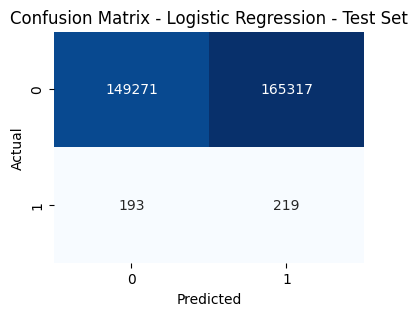

In [9]:
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    solver='saga',
    penalty='l2'
)

lr_model.fit(X_train, y_train)

evaluate_model(lr_model, X_train, y_train, title="Logistic Regression - Training Set")
evaluate_model(lr_model, X_test, y_test, title="Logistic Regression - Test Set")

#### 10.7. Local Outlier Factor (LOF)

LOF is an unsupervised anomaly detection method adapted for fraud detection:
- We sample up to 50,000 training instances to reduce computation
- `n_neighbors=20` defines the local neighborhood
- `contamination=0.1` specifies the expected fraction of outliers
- `novelty=True` allows predicting new unseen data
- `n_jobs=-1` enables parallel computation

We evaluate the LOF model on training and test sets using `evaluate_lof`, converting outliers into predicted fraud labels.

c:\Users\nicol\Documents\ESILV\S9\Project #\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\nicol\Documents\ESILV\S9\Project #\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



-------------------------------------------
Evaluation on: LOF - Training Set
-------------------------------------------
Accuracy:       0.4996
Precision:      0.4976
Recall:         0.0900
F1-score:       0.1524
ROC-AUC:        0.4851

Classification report:
              precision    recall  f1-score   support

         0.0     0.4998    0.9091    0.6450     26646
         1.0     0.4976    0.0900    0.1524     26646

    accuracy                         0.4996     53292
   macro avg     0.4987    0.4996    0.3987     53292
weighted avg     0.4987    0.4996    0.3987     53292



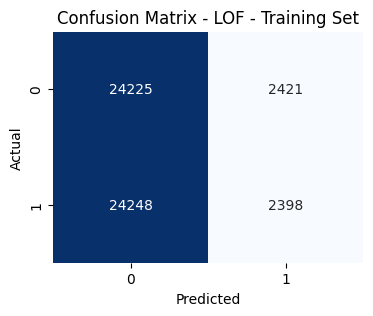

c:\Users\nicol\Documents\ESILV\S9\Project #\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\nicol\Documents\ESILV\S9\Project #\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



-------------------------------------------
Evaluation on: LOF - Test Set
-------------------------------------------
Accuracy:       0.8927
Precision:      0.0011
Recall:         0.0874
F1-score:       0.0021
ROC-AUC:        0.4802

Classification report:
              precision    recall  f1-score   support

         0.0     0.9987    0.8937    0.9433    314588
         1.0     0.0011    0.0874    0.0021       412

    accuracy                         0.8927    315000
   macro avg     0.4999    0.4906    0.4727    315000
weighted avg     0.9974    0.8927    0.9421    315000



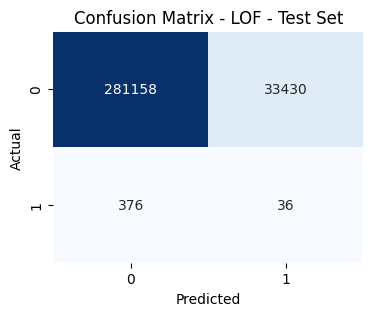

In [10]:
sample_size = min(50000, len(X_train))

X_train_sample = X_train.sample(sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

lof_model = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1,
    novelty=True,
    n_jobs=-1
)

lof_model.fit(X_train_sample)

evaluate_lof(lof_model, X_train, y_train, title="LOF - Training Set")
evaluate_lof(lof_model, X_test, y_test, title="LOF - Test Set")

#### 10.8. Model Performance Comparison

In this section, we systematically compare the performance of all trained models on the test set. This includes:

- **Random Forest**
- **XGBoost**
- **LightGBM**
- **Logistic Regression**
- **Local Outlier Factor (LOF, anomaly detection)**

### Steps:

1. **Compute Metrics**  
   We calculate key performance metrics for each model:
   - **Accuracy**: overall correctness
   - **Precision**: proportion of predicted frauds that are actual frauds
   - **Recall**: proportion of actual frauds detected
   - **F1-Score**: harmonic mean of precision and recall
   - **ROC-AUC**: ability to distinguish between fraud and non-fraud across thresholds  

   LOF predictions are converted from anomaly detection outputs to fraud labels.

2. **Store Metrics in a DataFrame**  
   All results are stored in `comparison_df` for easier visualization and comparison.

3. **Identify Best Models**  
   For each metric, we identify which model achieved the highest score.

4. **Visualize Comparison**  
   - Horizontal bar plots show the performance of all models per metric.
   - The best-performing model for each metric is highlighted in **gold**.
   - This helps quickly identify the strongest model for each evaluation criterion.

Notes:
- Highlighting the best models allows us to assess trade-offs, e.g., a model may have the highest ROC-AUC but lower precision.
- LOF is included as an anomaly detection baseline, useful for unsupervised fraud detection scenarios.
- Visualization ensures interpretability and communicates results clearly to stakeholders.

Overall, this comparison provides a comprehensive overview of model performance, guiding the choice of the best model for deployment.

c:\Users\nicol\Documents\ESILV\S9\Project #\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\nicol\Documents\ESILV\S9\Project #\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


                  Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
          Random Forest  0.527286   0.001531 0.553398  0.003053 0.568245
                XGBoost  0.585587   0.001952 0.618932  0.003892 0.652899
               LightGBM  0.537225   0.001659 0.587379  0.003309 0.577084
    Logistic Regression  0.474571   0.001323 0.531553  0.002639 0.514884
LOF (Anomaly Detection)  0.892679   0.001076 0.087379  0.002125 0.480168
   • Accuracy    : LOF (Anomaly Detection)   (0.8927)
   • Precision   : XGBoost                   (0.0020)
   • Recall      : XGBoost                   (0.6189)
   • F1-Score    : XGBoost                   (0.0039)
   • ROC-AUC     : XGBoost                   (0.6529)


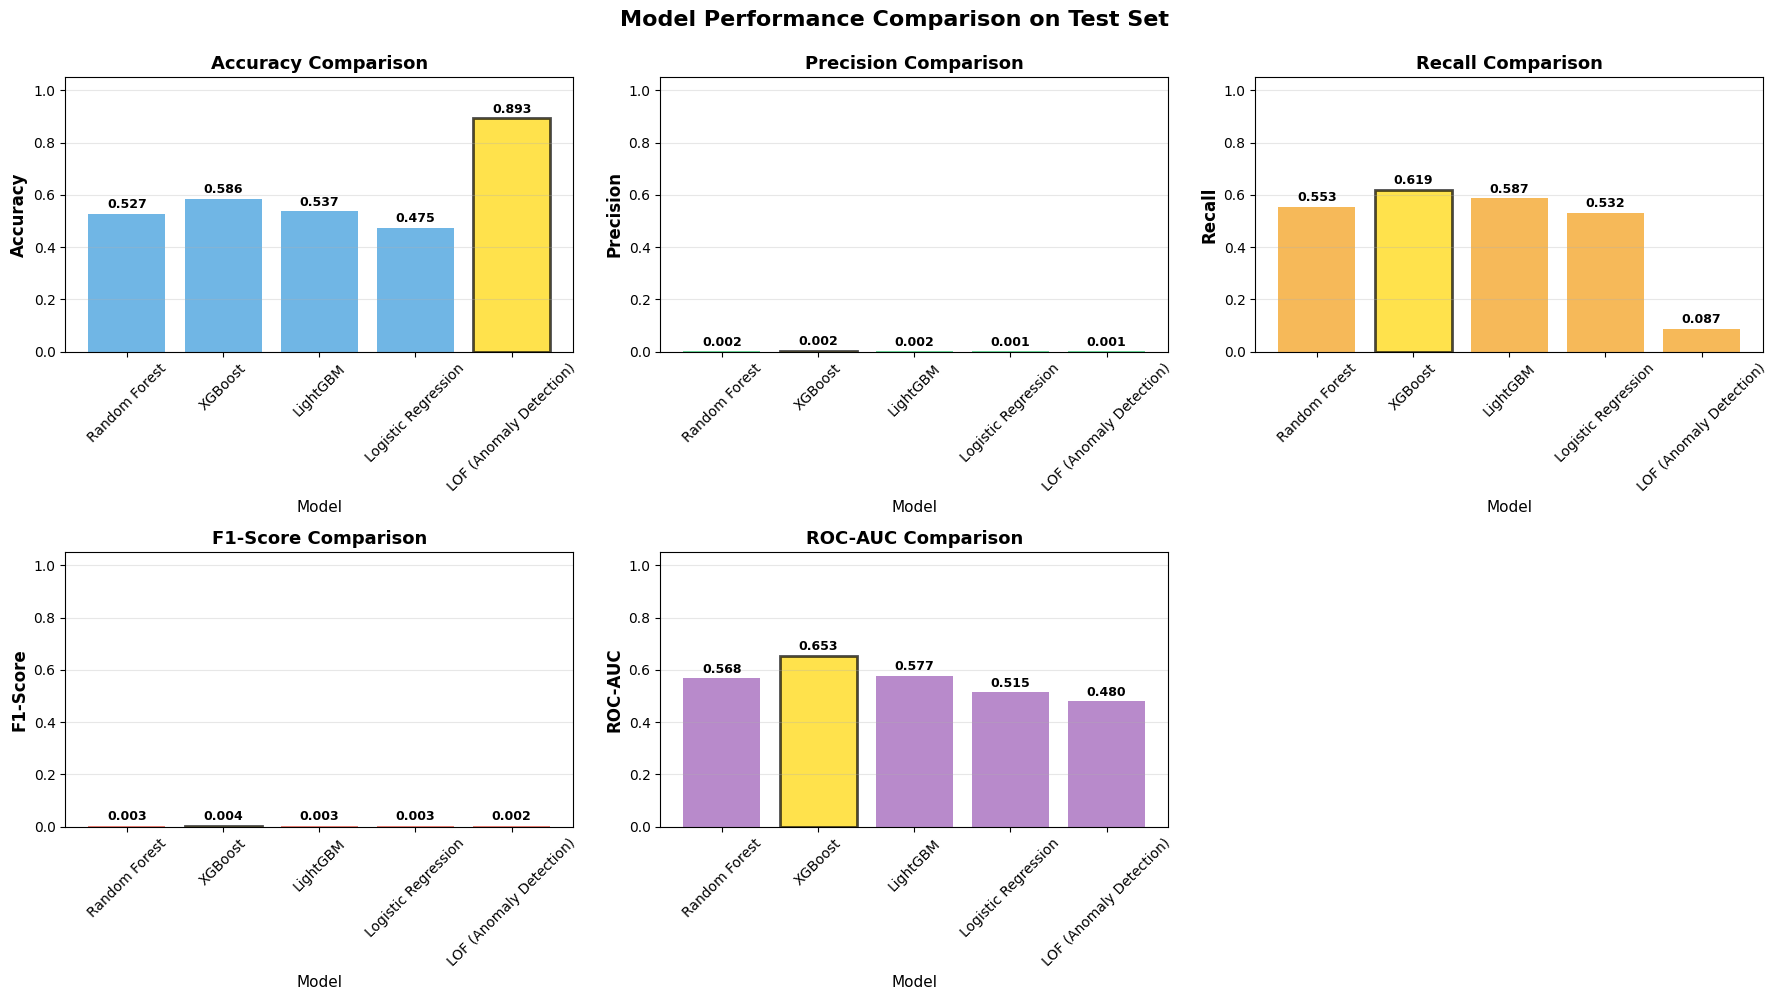

In [11]:
comparison_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

def get_metrics(model, X, y, model_name, is_lof=False):
    if is_lof:
        preds_lof = model.predict(X)
        preds = np.where(preds_lof == -1, 1, 0)
        scores = -model.decision_function(X)
    else:
        preds = model.predict(X)
        scores = model.predict_proba(X)[:, 1]
    
    comparison_results['Model'].append(model_name)
    comparison_results['Accuracy'].append(accuracy_score(y, preds))
    comparison_results['Precision'].append(precision_score(y, preds, zero_division=0))
    comparison_results['Recall'].append(recall_score(y, preds, zero_division=0))
    comparison_results['F1-Score'].append(f1_score(y, preds, zero_division=0))
    comparison_results['ROC-AUC'].append(roc_auc_score(y, scores))

get_metrics(model, X_test, y_test, "Random Forest")
get_metrics(xgb_model, X_test, y_test, "XGBoost")
get_metrics(lgb_model, X_test, y_test, "LightGBM")
get_metrics(lr_model, X_test, y_test, "Logistic Regression")
get_metrics(lof_model, X_test, y_test, "LOF (Anomaly Detection)", is_lof=True)

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.to_string(index=False))

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    print(f"   • {metric:12s}: {best_model:25s} ({best_score:.4f})")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=colors[idx], alpha=0.7)
    
    best_idx = comparison_df[metric].idxmax()
    bars[best_idx].set_color('gold')
    bars[best_idx].set_edgecolor('black')
    bars[best_idx].set_linewidth(2)
    
    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('Model', fontsize=11)
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 1.05)
    
    for i, (bar, value) in enumerate(zip(bars, comparison_df[metric])):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[5].axis('off')

plt.suptitle('Model Performance Comparison on Test Set', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()